# Exercise 5.26

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.linalg as la
from scipy import stats

In [2]:
def load_data() -> pd.DataFrame:
    # Five types of overtime hours for the Madison, Wisconsin, Police.
    fpth = pathlib.Path(r'..\..\data\Table5.8.xlsx')
    return pd.read_excel(fpth)

In [3]:
overtime_df = load_data()[['Legal Appearances Hours', 'Extraordinary Event Hours', 'Holdover Hours']]
overtime_df.head(3)

,Legal Appearances Hours,Extraordinary Event Hours,Holdover Hours
0,3387,2200,1181
1,3109,875,3532
2,2670,957,2502


In [4]:
n, p = overtime_df.shape
alpha = 0.05
X = overtime_df.to_numpy()

In [5]:
xbar = np.mean(X, axis=0).reshape(p, 1)
xbar

array([[3557.75  ],
       [1478.4375],
       [2676.875 ]])

In [6]:
S = np.cov(X, rowvar=False)
S

array([[ 367884.73333333,  -72093.81666667,   85714.76666667],
       [ -72093.81666667, 1399053.0625    ,   43399.85833333],
       [  85714.76666667,   43399.85833333, 1458543.05      ]])

Compute the $T^{2}$ values, using ${(\textbf{x} - \bar{\textbf{x}})}^{\prime} \textbf{S}^{-1} {(\textbf{x} - \bar{\textbf{x}})}$

In [7]:
T2 = list()
for i in range(n):
    T2.append(((X[i,:].reshape(p,1) - xbar).T @ la.inv(S) @ (X[i, :].reshape(p,1) - xbar)).item())

In [8]:
ucl_crit95 = stats.chi2.ppf(1-0.05, p)
ucl_crit99 = stats.chi2.ppf(1-0.01, p)
print(f'95% UCL = {ucl_crit95}')
print(f'99% UCL = {ucl_crit99}')

95% UCL = 7.814727903251179
99% UCL = 11.344866730144373


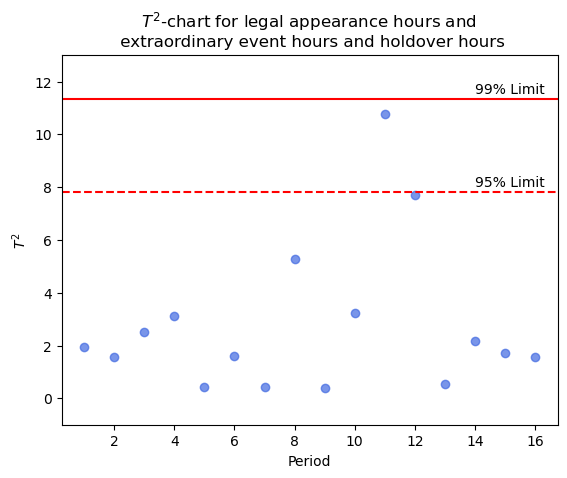

In [9]:
plt.axhline(y=ucl_crit95, color='r', linestyle='--')
plt.axhline(y=ucl_crit99, color='r', linestyle='-')
plt.annotate('95% Limit', xy=(15, ucl_crit95), xytext=(14, ucl_crit95+.2))
plt.annotate('99% Limit', xy=(15, ucl_crit99), xytext=(14, ucl_crit99+.2))

plt.scatter(np.arange(n)+1, T2, alpha=0.70, facecolors='royalblue', edgecolors='royalblue')
plt.ylim([-1, 13])
plt.title(f'$T^{2}$-chart for legal appearance hours and \n extraordinary event hours and holdover hours')
plt.xlabel('Period')
plt.ylabel('$T^{2}$')
plt.savefig('Question-5-26-T2.png')
plt.show()